# The Sparks Foundation - GRIP July 2021



# Task -1 Prediction using Supervised ML



# Author : Saurabh Yadav


# Problem Statement

    * Predict the percentage of an student based on the number of study  hours.




# Importing Libraries 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection and Pre-Processing

In [2]:
# Reading the data 
url="http://bit.ly/w-data"
data=pd.read_csv(url)


In [3]:
# See the first 5 rows of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

 As there is no null values in the dataset,we can now visualize our data and see if we can manually find any relationship between the data.

# Data Visualization

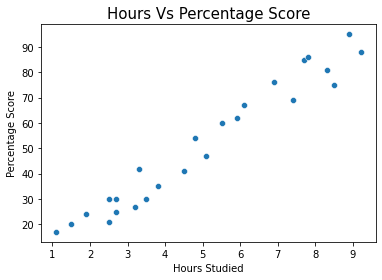

In [7]:
# Plotting the distribution of scores
sns.scatterplot(y=data['Scores'],x=data['Hours'])  
plt.title('Hours Vs Percentage Score',size=15)
plt.ylabel('Percentage Score',size=10) 
plt.xlabel('Hours Studied',size=10)  
plt.show()

From the above scatterplot ,we can clearly see that there is a positive linear between the "Number of Hours studied" and the "Percentage Score".

# Correlation

In [8]:
# Correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above data output,it is confirmed that the variables are positively correlated.

# Preparing the Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
# x-> attributes // y-> labels

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
# Splitting the data (Training & Test datasets)
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
print(" X_train=",X_train.shape)
print(" X_test=",X_test.shape)
print(" y_train=",y_train.shape)
print(" y_test=",y_test.shape)

 X_train= (18, 1)
 X_test= (7, 1)
 y_train= (18,)
 y_test= (7,)


We have split the dataset as -> 75% Training data and 25% Test data 

# Training the Model

We will use the Linear Regression Model which is a Supervised Machine Learning Algorithm.

In [11]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [12]:
# Intercept
print("Intercept:", lr.intercept_)

Intercept: 1.9322042531516601


In [13]:
# Coefficient
print("Coefficient:",lr.coef_)

Coefficient: [9.94167834]


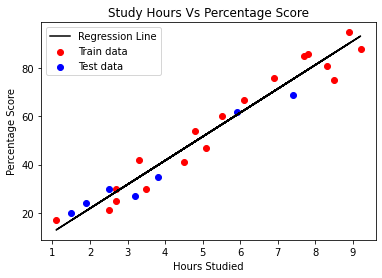

In [14]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train, label="Train data",color="red")
plt.scatter(X_test, y_test, label="Test data",color="blue")
plt.title("Study Hours Vs Percentage Score")
plt.plot(X, line, color="black", label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
# Testing data - In Hours
print(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [16]:
# Predicting the scores
y_pred = lr.predict(X_test) 

In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Hours':[i[0] for i in X_test] , 'Predicted Scores': [k for k in y_pred]})  
df 

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [18]:
compare_scores=pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred})
compare_scores

,Actual Score,Predicted Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


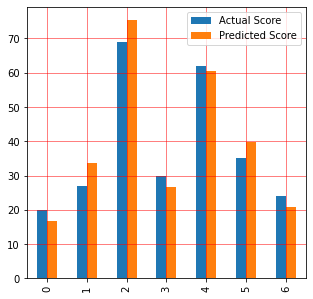

In [19]:
# Plotting the bar graph to depict the difference between the actual and predicted value
compare_scores.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5',color='red')
plt.grid(which='minor',linewidth='0.5',color='blue')
plt.show()

# Evaluating the Model

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482


Small value of Mean absolute error states that the chance of error forecasting through the model is very least.


Now we can predict the marks by giving the input of number of hours studied.


Project Question:What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hours =[[9.25]] 
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(own_pred[0],3)))

No of Hours = [[9.25]]
Predicted Score = 93.893


 The interpretation of our regression model is that if a student studies for 9.25 hours a day ,he/she is likely to score 93.893 marks.

# ------------------------------------------THE END----------------------------------------------------

# Task 1 Completed